<a href="https://colab.research.google.com/github/peeush-the-developer/LGMVIP-DataScience/blob/main/Stock-Prices-Prediction-LSTM/stacked_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock market prices prediction and forecasting using Stacked LSTM

We're given the dataset to analyse and produce a Stacked LSTM model that can forecast stock prices for TATA Global Beverage's.

## Dataset
[Dataset](https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)

Data is given from 2010-07-21 to 2018-09-28

Columns in the dataset:
- __Date:__ Date of the trade
- __Open:__ What was the opening price for the share that day
- __High:__ What is the highest price of the share that day
- __Low:__ What is the lowest value of the stock
- __Last:__ What is the last value of the stock
- __Close:__ What was the closing price of the stock
- __Total Trade Quantity:__ Total trade quantity of stock
- __Turnover (Lacs):__ Total turnover for the company

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Normalization
from sklearn.preprocessing import MinMaxScaler

## Load the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()
# training_set = dataset_train.iloc[:, 1:2].values

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
# Convert the Date into pandas DateTime format
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [5]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Visualize the data for "Open" and "High" columns

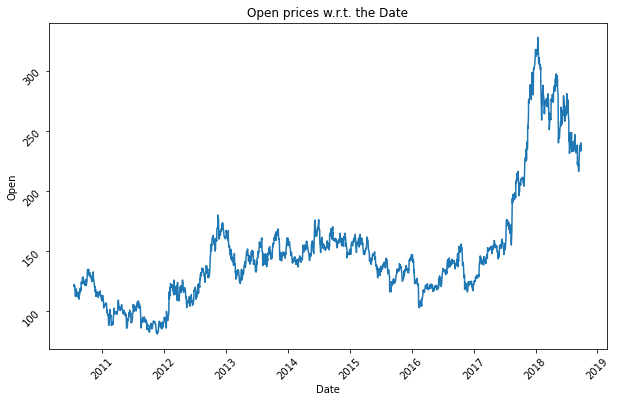

In [6]:
# Plot "Open" prices w.r.t. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Open'])
# plt.plot(data['Date'], data['High'], 'go')
plt.tick_params(rotation=45)
plt.title('Open prices w.r.t. the Date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

## Prepare the data

From the given dataset, we select column "Open" as our training dataset.

In [7]:
# Training set for "Open" column
training_set = data.iloc[:, 1:2].values
# Check first 5 values
training_set[:5]

array([[234.05],
       [234.55],
       [240.  ],
       [233.3 ],
       [233.55]])

### Normalize the data

For the neural network, we should scale the dataset before passing as the input.

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

### Create 3D array from input data

LSTM model requires the input in the form of a 3D array. 

Steps:
1. Create data in 60 timesteps
2. Convert into numpy array
3. Convert the array into 3D array

In [9]:
# 1. Create data in 60 timesteps
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0]) # Take 60 timesteps into X_train
    y_train.append(training_set_scaled[i, 0]) # Take 61st timestep into y_train

# 2. Convert into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# 3. Convert array into 3D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1975, 60, 1)

In [11]:
y_train.shape

(1975,)

## Create a Stacked LSTM model

In [12]:
from keras.models import Sequential # Initialize the model
from keras.layers import LSTM       # Add LSTM layer
from keras.layers import Dropout    # Add Dropout layer to prevent overfitting
from keras.layers import Dense      # Add densely connected NN layer

The LSTM layer is added with the following arguments:
- 50 units is the dimensionality of the output space,
- `return_sequences=True` is necessary for stacked LSTM layers so that the consequent LSTM layer has a 3D sequence input
- `input_shape` is the shape of the training dataset.

Dropout layer: 0.2 i.e. 20% of the neurons in the layers will be dropped.

Add "Dense layer" which specifies the output as one unit.

Finally, compile the model to be able to train with `Adam` optimizer and `mse` as the loss function.

Run for 100 epochs and batch size of 32.

In [13]:
# Initialize the model
model = Sequential()
# Layer 1 - LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Layer 1 - Dropout
model.add(Dropout(0.2))
# Layer 2 - LSTM
model.add(LSTM(units=50, return_sequences=True))
# Layer 2 - Dropout
model.add(Dropout(0.2))
# Layer 3 - LSTM
model.add(LSTM(units=50, return_sequences=True))
# Layer 3 - Dropout
model.add(Dropout(0.2))
# Layer 4 - LSTM
model.add(LSTM(units=50))
# Layer 4 - Dropout
model.add(Dropout(0.2))
# Layer 5 - Dense
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Fit the Stacked LSTM model

In [14]:
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 7s 14ms/step - loss: 0.0110
Epoch 2/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 5/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 10/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 13/100
62/62 [=====

### Predict using trained Stacked LSTM model

Import the test set from the [link](https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv) to evaluate the model


In [15]:
data_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
data_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [16]:
data_test.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
11,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
12,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
13,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
14,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
15,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


### Prepare the test dataset same as training set

In [17]:
testing_set = data_test.iloc[:, 1:2].values

Modify the test set:
- Merge the training and test set on axis=0,
- set 60 as the timestep,
- use same scaler to scale the data
- reshape the dataset

In [18]:
data_all = pd.concat([data['Open'], data_test['Open']], axis=0)
inputs = data_all[len(data_all) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [19]:
inputs.shape

(76, 1)

In [20]:
# 1. Create data in 60 timesteps
X_test = []
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i, 0])

# 2. Convert into array
X_test = np.array(X_test)

# 3. Convert to 3D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
# Predict the prices for given input
predicted_stock_prices = model.predict(X_test)

predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

## Visualize the predictions and actuals

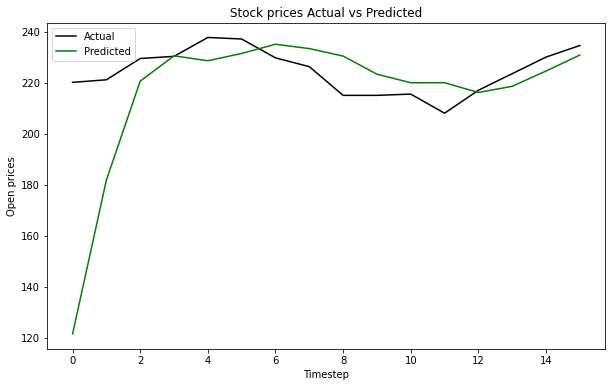

In [22]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(testing_set, color='black', label='Actual')
plt.plot(predicted_stock_prices, color='green', label='Predicted')
plt.title('Stock prices Actual vs Predicted')
plt.xlabel('Timestep')
plt.ylabel('Open prices')
plt.legend()
plt.show()

Well! That's not bad, though our model is not that accurate, but it could learn the trends of when it is going up or down.